# Cogs 118C, Spring 2020


## HW6

Name: Malachi Mabie

Student ID: A15737533

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import scipy.signal

# 1. Simulating spike trains with Poisson statistics

Text(0, 0.5, 'intensity fluctuation')

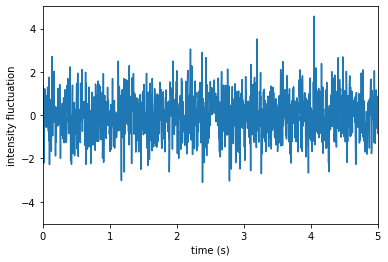

In [2]:
# a) white noise stimulus s(t). Represents fluctuations in intensity around a fixed baseline.
refresh = 256 #Hz
duration = 5*60 # 5 minutes (in seconds)

stimulus = np.random.normal(loc=0.0,scale=1.0,size=duration*refresh)
# plot first 5s of stimulus.
t = np.arange(0, duration, 1/refresh)
plt.plot(t, stimulus)
plt.xlim(0,5) # plot first 5 seconds of data
plt.xlabel("time (s)")
plt.ylabel("intensity fluctuation")


In [3]:
# b) Plot impulse response function...
def h_filter(t):
    R = 6 # Hz: mean firing rate
    Tau = 70*10**-3. # time constant
    return R*(1/refresh)*t/Tau**2*np.exp(-t/Tau)

Text(0, 0.5, 'filter h(t)')

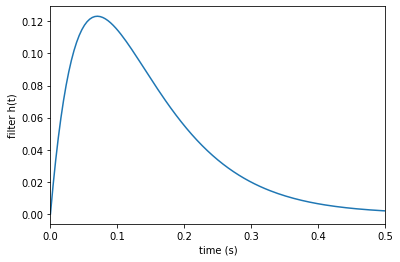

In [4]:
t = np.arange(0,1,1/refresh)
function = []
for time in t:
    function.append(h_filter(time))
impulse = np.array(function)
plt.plot(t,impulse)
plt.xlim(0,.5)
plt.xlabel("time (s)")
plt.ylabel("filter h(t)")

#### c) what kind of filter is this?
    band pass filter where the band is a low band with soft decay.

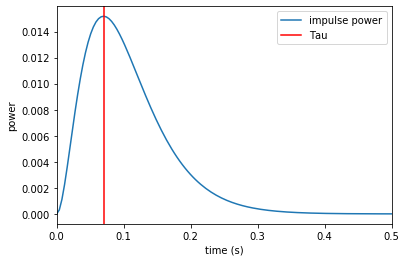

In [5]:
# plot the squared magnitude of the transfer function (ie power)]
transfer = np.abs(impulse)**2
plt.plot(t,transfer,label="impulse power")
plt.axvline(70*10**-3,color="red",label="Tau")
plt.xlim(0,.5)
plt.xlabel("time (s)")
plt.ylabel("power")
plt.legend()


#### comment on relationship between the cutoff frequency and Tau.
    Tau marks the peak of the impulse.

Text(0, 0.5, 'retinal ganglion cell response')

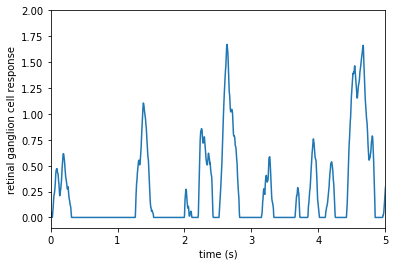

In [6]:
# d) convolve and apply a “rectifying” nonlinearity
#    to produce the RGC’s firing rate as a function of time. r(t)
convolve = scipy.signal.convolve(stimulus, impulse)
rgc_fire_rate = convolve * (convolve > 0)


t = np.arange(0, len(convolve)/refresh, 1/refresh)
plt.plot(t,rgc_fire_rate)
plt.xlim(0,5)
plt.ylim(-.1,2)
plt.xlabel("time (s)")
plt.ylabel("retinal ganglion cell response")

Text(0.5, 1.0, 'poisson spike train')

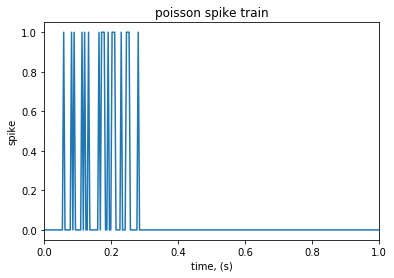

In [19]:
# e) Simulate a Poisson spike train, (t), with rate r(t), that is the size of s(t).
T = duration # 5 minutes
Fs_spike = refresh # 256 Hz
num_samples = T*Fs_spike
spike_train = np.zeros(num_samples) # create blank array of size
for i in range(0, len(spike_train)):
    spike_train[i] = int(np.random.rand() < rgc_fire_rate[i])
    # will give 1 with probability r*dt.


t = np.arange(0, duration, 1/refresh)
plt.plot(t,spike_train)
plt.xlim(0,1)
plt.xlabel("time, (s)")
plt.ylabel("spike")
plt.title("poisson spike train")
#the probability of a spike occurring in any time step is
# the probability of having one or more spikes in the time step.

(0, 1)

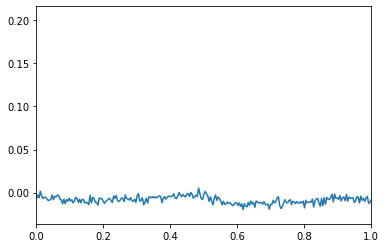

In [30]:
# f) Compute the reverse correlation h_est(t) by convolving spike train with s(-t)
h_est = scipy.signal.convolve(spike_train, stimulus[::-1], 'same')
# Divide by number of spikes to obtain an estimate, h_est, of the cell’s filter, h.
num_spikes = np.sum(spike_train)
h_est = h_est / num_spikes
plt.plot(t, h_est)
plt.xlim(0,1)

(0, 1)

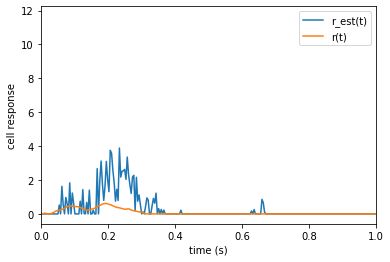

In [40]:
# g) Convolve the estimated filter, h_est, with s,
r_est = scipy.signal.convolve(h_est, stimulus, 'same')
#    and apply the rectification to produce a predicted spike rate, r_est(t).
r_est = r_est * (r_est > 0)

# Compare this estimate with the true spike rate, r(t).
plt.plot(t, r_est,label="r_est(t)")

t2 = np.arange(0, len(convolve)/refresh, 1/refresh)
plt.plot(t2, rgc_fire_rate,label="r(t)")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("cell response")
plt.xlim(0,1)

# 2. Permutation-based analysis of spike train statistics

In [51]:
# a) Shuffle the spike times
# and compute the reverse-correlation of the original stimulus with the shuffled spike
shuffled = np.random.permutation(spike_train)
corr = np.correlate(stimulus, shuffled)
print("reverse-correlation: ", corr[0])

reverse-correlation:  -67.98867406693353


In [53]:
# b) Repeat the randomization and rev-corr computation 500 times
rev_corrs = []
for i in range(0,500):
    shuffled = np.random.permutation(spike_train)
    rev_corrs.append(np.correlate(stimulus, shuffled)[0])
    print(rev_corrs[i])
    

-29.1238093339591
-24.57700986742129
-140.7995423644485
25.24488809600197
-70.41683837711145
-118.87827587481884
-239.485735639434
-42.842831390142166
79.14401521835678
247.30512645531192
-14.205826861494316
-43.083370579075975
192.42772762935294
71.98789210504748
48.76003063683151
-133.004314831328
-65.8223337993507
-159.52543682833868
104.6279688315166
-57.63609917922706
111.86792137755901
-92.4797372673217
-202.7301411453734
-147.60966520853802
-232.5034018696923
6.29260415321238
-33.27420018895852
29.895588060905677
-49.262511578957344
-180.61753576279867
-184.1966408257086
-85.9579351747775
-14.437105164687438
-188.35987709912058
-306.84306521428914
87.59229437850831
-147.27017242050036
-22.857249078015936
113.42359168803787
-69.64695752577603
-168.04758626426636
-33.804263854610916
143.547258290903
-69.24374044548297
-12.573798433033424
-91.26738839535523
-217.48052930368857
-45.151340382709186
0.0771899602005881
159.26011263491813
-289.9261622703882
23.51097843989349
-225.728034

-155.57964444840428
32.57316770816027
148.56928624764902
-140.29233460176573
-10.77944583582427
48.8844967427038
166.81382374202232
-46.247513560731996
269.96491379740473
-129.93125555595395
248.2182163087503
-93.52275217303176
98.74618152593118
5.94383386371547
-250.59134319462632
-133.6615945514481
-68.09660889567174
136.24958453743142
61.6829874279523
-2.7268469964563558
-92.79162216797997
32.708513412874424
-94.03442015228671
140.56174921423587
-13.264125921794427
-59.21955063542272
88.6345758061932
55.56480265115966
-137.9641867429636
-14.991506551443319
178.54717871634028
34.63380969762722
185.96425673182523
71.93793847161416
4.579608932888039
-68.36650330348984
104.38146858729175
-110.33413654777
7.977064476130714
-52.541929101161344
-275.2884318786454
-128.30119047474713
84.05022141574315
-96.79184997877515
9.8058679128032
-251.72984493757338
335.76350791619825
-114.05671184618586
231.15951739783983
-17.62846514017998
-154.4801349155963
-164.04662841724516
144.86558498601764
-6

In [ ]:
# c) define an empirical p-val for each time bin (t)
real_rev_corr = np.correlate(stimulus, spike_train)
p = 